# Принятие решений в бизнесе на основе данных

# Описание проекта:

Подготовлен список гипотез для увеличения выручки в интернет-магазине. Необходимо их приоритизировать, запустить A/B-тест и проанализировать результаты.

# Цели работы:

1. Научиться приоритизировать гипотезы
2. Принять решение о успешности/неуспешности A/B-теста.

# Задачи работы:

## Часть 1:

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

## Часть 2:

Проанализировать A/B-тест:
1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить  график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.max_colwidth', 150)
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Первая часть

In [2]:
hps = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hps

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hps.columns = hps.columns.str.lower()

In [5]:
# Вычислим результат фреймворка ICE  и Rice в отдельных столбцах 
hps['ice'] = ((hps['impact'] * hps['confidence'])/hps['efforts']).round(2)

In [6]:
hps['rice'] = (hps['reach'] * hps['impact'] * hps['confidence'])/hps['efforts']

In [7]:
hps

,hypothesis,reach,impact,confidence,efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [8]:
hps['hypothesis'][0]

'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'

In [9]:
ice = hps[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)
rice = hps[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

In [10]:
ice

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Согласно метрике ice в первой четвёрке оказались гипотезы 8, 0, 7 и 6.

In [11]:
rice

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Согласно метрике rice  в первой четвёрке оказываются гипотезы 7, 2, 0 ,6. Отличие этих метрих заключается в охвате пользователей. И хотя гипотеза 8 в ice занимает первое место, повлияет она на небольшое количество людей, поэтому в rice она находится уже на 5 месте. Гипотеза 6 в обеих метриках занимает четвёртое место. А гипотеза 2 с пятого места перешла на второе, это означает значительный охват пользователей. Для дальнейшего анализа точно стоило бы выбрать гипотезы под номерами 7 и 2. Гипотезы 0 и 6 стоит проверить сейчас, при достаточном объёме средств, или оставить их на будущее.

# Часть 2. Анализ A/B-теста

## Предобработка данных

In [12]:
order = pd.read_csv('/datasets/orders.csv')
order

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
order.duplicated().sum()

0

In [15]:
visitor = pd.read_csv('/datasets/visitors.csv')
visitor

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [16]:
visitor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [17]:
visitor.duplicated().sum()

0

Пропуски и повторы в таблицах order и visitor отсутствуют. Изменим тип столбцов в с датами на datetime. И приведём отдельные колонки к общепринятому виду.

In [18]:
order = order.rename(columns = {'transactionId' : 'transaction_id', 'visitorId':'visitor_id'})

In [19]:
order['date'] = pd.to_datetime(order['date'])

In [20]:
visitor['date'] = pd.to_datetime(visitor['date'])

In [21]:
order.groupby('group')['visitor_id'].count()

group
A    557
B    640
Name: visitor_id, dtype: int64

Посмотрим, есть ли пользователи, попавшие в обе группы теста

In [22]:
group_a = order[order['group']=='A'][['date', 'visitor_id']]
group_b = order[order['group']=='B'][['date', 'visitor_id']]

In [23]:
# Так как пользователи могут совершать несколько покупок, удалим возможные дубликаты
group_a['visitor_id'] = group_a['visitor_id'].drop_duplicates()
group_b['visitor_id'] = group_b['visitor_id'].drop_duplicates()

In [24]:
group_a = group_a.dropna(subset=['visitor_id']).reset_index(drop=True)
group_b = group_b.dropna(subset=['visitor_id']).reset_index(drop=True)

In [25]:
group_a['visitor_id'] = group_a['visitor_id'].astype('int')
group_b['visitor_id'] = group_b['visitor_id'].astype('int')

In [26]:
# Соединяем полчившиеся таблицы групп, чтобы посмотреть, присутствуют ли пользователи, попавшиие в обе группы
cross_group = group_a.merge(group_b, on='visitor_id', how='inner', suffixes=['_a', '_b'])

In [27]:
cross_group.head()

,date_a,visitor_id,date_b
0,2019-08-15,4069496402,2019-08-12
1,2019-08-15,199603092,2019-08-02
2,2019-08-15,3803269165,2019-08-23
3,2019-08-15,2378935119,2019-08-25
4,2019-08-15,237748145,2019-08-15


In [28]:
cross_group.count()

date_a        58
visitor_id    58
date_b        58
dtype: int64

Получили 58 пользователей, попавших в обе группы. Исключим их из дальнейшего анализа, так как они могут сильно зашумлять результаты при данном количестве всех пользователей.

In [29]:
order_clean = order[~order['visitor_id'].isin(cross_group['visitor_id'])]

In [30]:
order_clean.groupby('group')['visitor_id'].count()

group
A    468
B    548
Name: visitor_id, dtype: int64

## Анализ и построение графиков

In [31]:
order_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


### Кумулятивная выручка

In [32]:
# Найдём суммарную выручку по каждой дате и группе, а затем накопительную выручку по каждой группе
cum_rev = (order_clean
    .groupby(['date', 'group'])[['revenue']]
           .sum()
           .groupby('group')[['revenue']]
           .cumsum()
           .reset_index())

In [33]:
cum_rev

,date,group,revenue
0,2019-08-01,A,142779
1,2019-08-01,B,59758
2,2019-08-02,A,234381
3,2019-08-02,B,221801
4,2019-08-03,A,346854
...,...,...,...
57,2019-08-29,B,4746610
58,2019-08-30,A,3311413
59,2019-08-30,B,4955833
60,2019-08-31,A,3364656


In [34]:
cum_rev_a = cum_rev[cum_rev['group']=='A']
cum_rev_b = cum_rev[cum_rev['group']=='B']

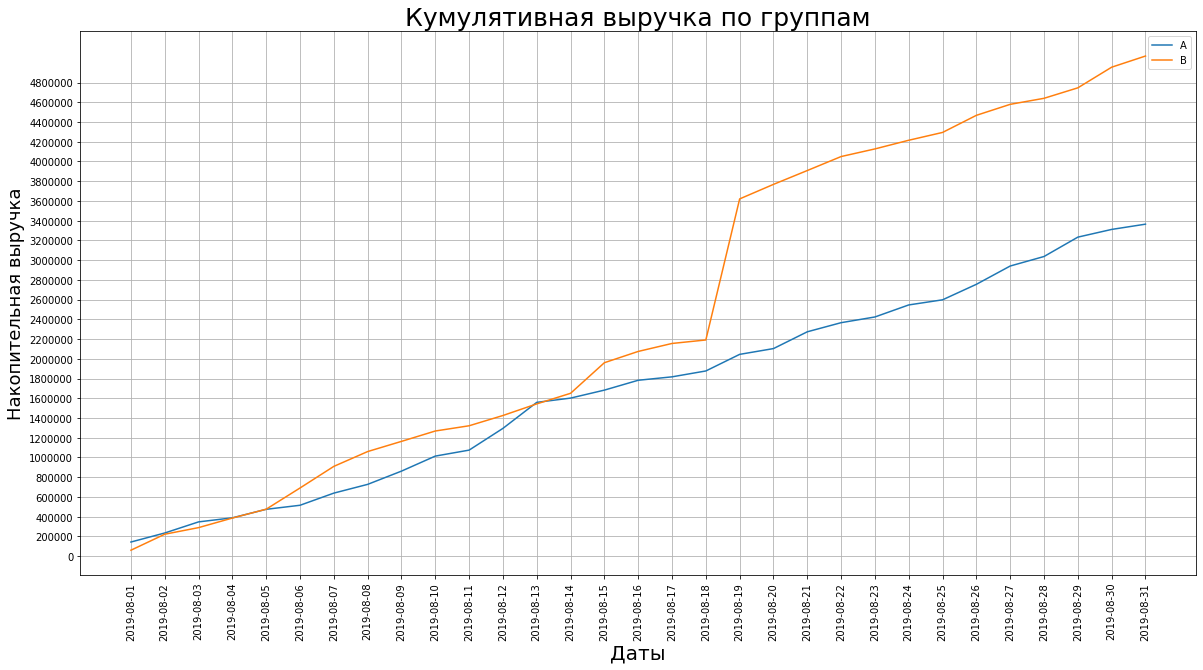

In [35]:
plt.subplots(figsize=(20, 10))
plt.plot(cum_rev_a['date'], cum_rev_a['revenue'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue'], label='B')
plt.legend()
plt.xticks(cum_rev_a['date'], rotation =90)
plt.grid()
plt.yticks(np.arange(0, 5000000, step=200000))
plt.title('Кумулятивная выручка по группам', fontsize = 25)
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Накопительная выручка', fontsize=18)
plt.show()

Общая выручка группы A достигает 3 миллионов 400 тысяч, а группа B к концу теста достигла 5 миллионов. Причём резкий скачок по  выручке в группе B произошёл с 18 на 19 числа. А далее идёт стабильный рост, особенно не отличающийся от группы A. Можем предположить, что произошла единичная большая покупка. 

In [36]:
# Объединим две таблицы накопительной выручки для построения графика относительной выручки группы B к A
merged_cum_rev = cum_rev_a.merge(cum_rev_b, on='date', how='left', suffixes=['_a', '_b'])

In [37]:
merged_cum_rev.head()

,date,group_a,revenue_a,group_b,revenue_b
0,2019-08-01,A,142779,B,59758
1,2019-08-02,A,234381,B,221801
2,2019-08-03,A,346854,B,288850
3,2019-08-04,A,388030,B,385740
4,2019-08-05,A,474413,B,475648


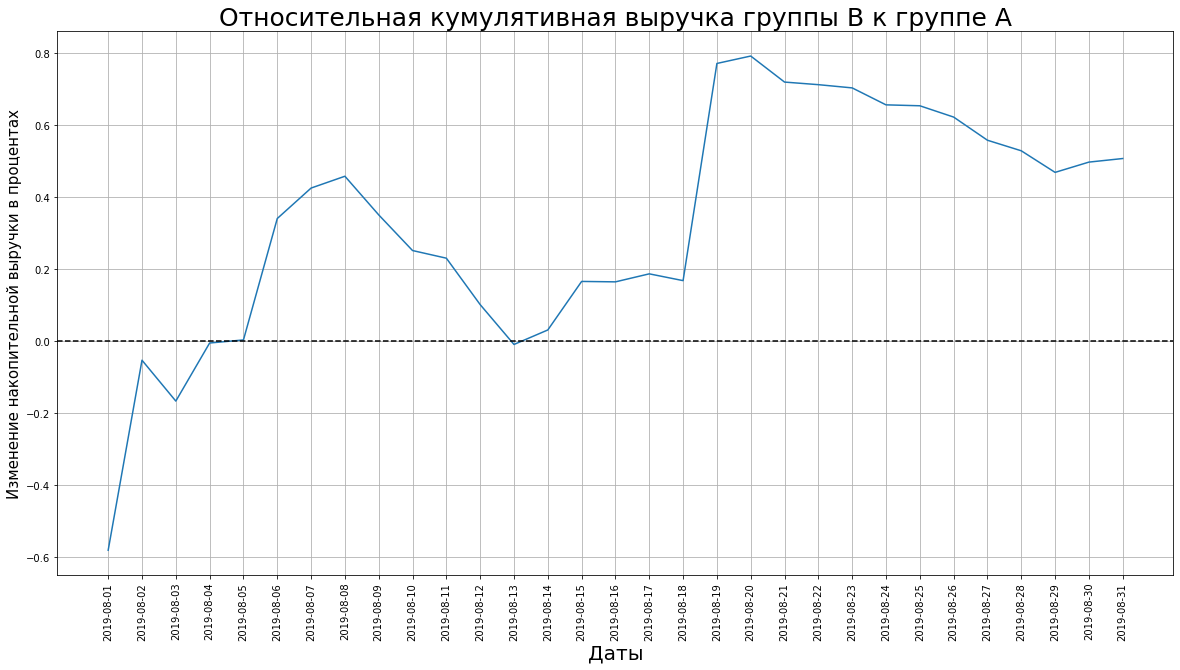

In [38]:
plt.subplots(figsize=(20, 10))
plt.plot(merged_cum_rev['date'], merged_cum_rev['revenue_b'] / merged_cum_rev['revenue_a']-1)
plt.xticks(merged_cum_rev['date'], rotation =90)
plt.grid()
plt.title('Относительная кумулятивная выручка группы B к группе A', fontsize = 25)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Изменение накопительной выручки в процентах', fontsize=15)
plt.show()

С пятого числа относительная кумулятивная выручка группы B становится на уровень с группой A и начинает рост, достигая пика в 40 процентов 8 числа. Затем падает вплоть до 13 числа, выравнивая с группой A. Далее происходит рост относительной выручки до 20 процентов к 15 числу, далее сохраняет свой уровень до 18 числа. И 18 на 19 числа опять видим резкий всплеск показателя до 80 процентов. И далее постепенное снижение до уровня 50 процентов к 29 числу. Как мы утверждаи ранее, с 18 на 19 числа быи совершены крайне дорогие покупки. Но добавились даты ещё одной возможной крупной покупки - с 5 на 6 числа. 

### Средний чек

Найдём кумулятивный средний чек. Для этого найдём средний чек по каждому дню и затем вычислим кумулятивный чек.

In [39]:
# Сгруппируем order_clean для дальнейших расчётов чека
av_ch = (order_clean
    .groupby(['date', 'group'])
    .agg({'visitor_id' : 'nunique', 'revenue' : 'sum', 'transaction_id' : 'count'})
    .reset_index()
    .rename(columns={'visitor_id' : 'visitors_number', 'revenue' : 'rev_by_day', 'transaction_id' : 'transaction_number'}))

In [40]:
av_ch['cum_rev'] = av_ch.groupby('group')['rev_by_day'].cumsum()

In [41]:
av_ch['cum_transactions'] = av_ch.groupby('group')['transaction_number'].cumsum()

In [42]:
av_ch['av_ch'] = (av_ch['rev_by_day'] / av_ch['transaction_number']).round(0).astype('int')

In [43]:
av_ch['cum_av_ch'] = (av_ch['cum_rev'] / av_ch['cum_transactions']).round(0).astype('int')

In [44]:
av_ch

,date,group,visitors_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch
0,2019-08-01,A,19,142779,23,142779,23,6208,6208
1,2019-08-01,B,17,59758,17,59758,17,3515,3515
2,2019-08-02,A,18,91602,19,234381,42,4821,5580
3,2019-08-02,B,22,162043,23,221801,40,7045,5545
4,2019-08-03,A,24,112473,24,346854,66,4686,5255
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189


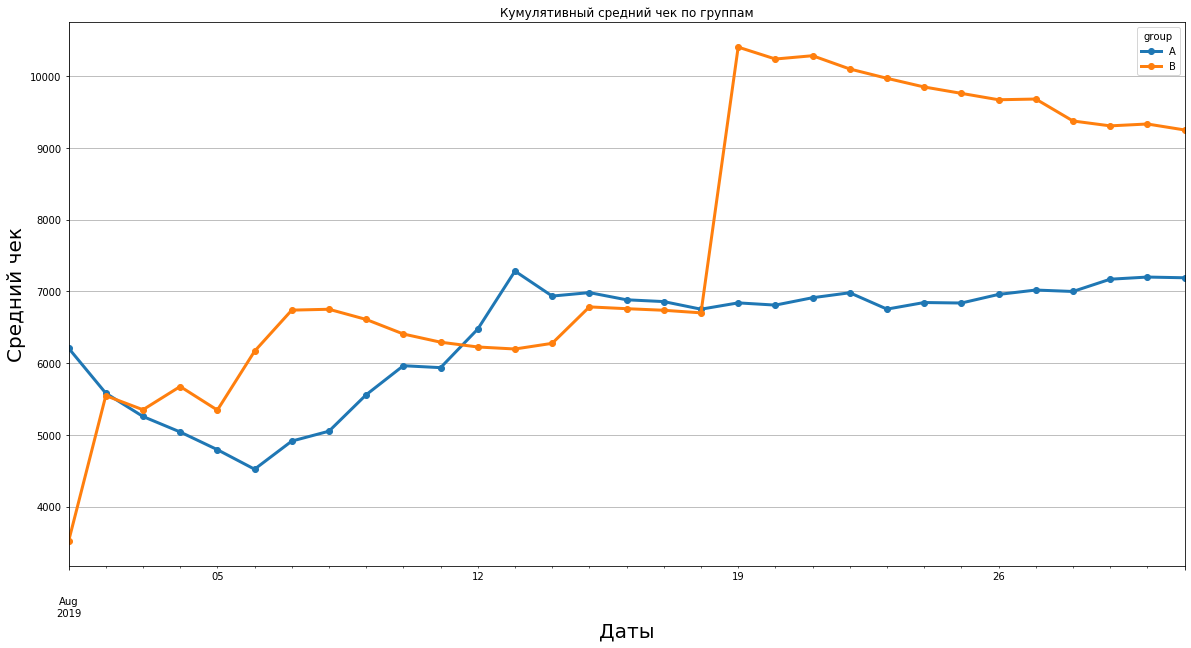

In [45]:
ax = (av_ch.pivot_table(index='date', columns='group', values='cum_av_ch')
      .plot(style='o-', grid=True, figsize=(20, 10), linewidth=3, title='Кумулятивный средний чек по группам'))
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Средний чек', fontsize=20)
plt.show()

Наблюдаем максимум кумулятивного среднего чека группы A в районе 7000, а группа B находит свой максимум на отметке в 10500. Как и с кумулятивной выручкой, с 18 на 19 числа происходит резкий скачок среднего чека в группе B с отметки 6800 до отметки в 10500. Как мы предполагали раньше, это выбивающаяся крупная покупка. С 5 по 7 числа виден рост среднего чека в группе B, но затем группы выравниваются на 11 число, а далее группа A делает скачок с 11 по 13 числа. После пика в 10500 группа постепенно падает, но остаётся выше группы A, минимум, на 2000.

Вычислим все оставшиеся показатели, создадим общую таблицу с разделением всех значений по группам, затем вычислим кумулятивные метрики и относительные показатели между группами, и закончим статистической обработкой.

Создадим таблицу со средним чеком в группах A и B

In [46]:
av_ch_a_b = av_ch[av_ch['group']=='A'][['date', 'group', 'av_ch', 'cum_av_ch']]\
.merge(av_ch[av_ch['group']=='B'][['date', 'group', 'av_ch', 'cum_av_ch']], on='date', how='left', suffixes=['_a', '_b'])

In [47]:
av_ch_a_b.head()

,date,group_a,av_ch_a,cum_av_ch_a,group_b,av_ch_b,cum_av_ch_b
0,2019-08-01,A,6208,6208,B,3515,3515
1,2019-08-02,A,4821,5580,B,7045,5545
2,2019-08-03,A,4686,5255,B,4789,5349
3,2019-08-04,A,3743,5039,B,6921,5673
4,2019-08-05,A,3926,4792,B,4281,5344


In [48]:
av_ch_a_b['cum_av_ch_a_to_b'] = (av_ch_a_b['cum_av_ch_b'] / av_ch_a_b['cum_av_ch_a'] - 1).round(2)

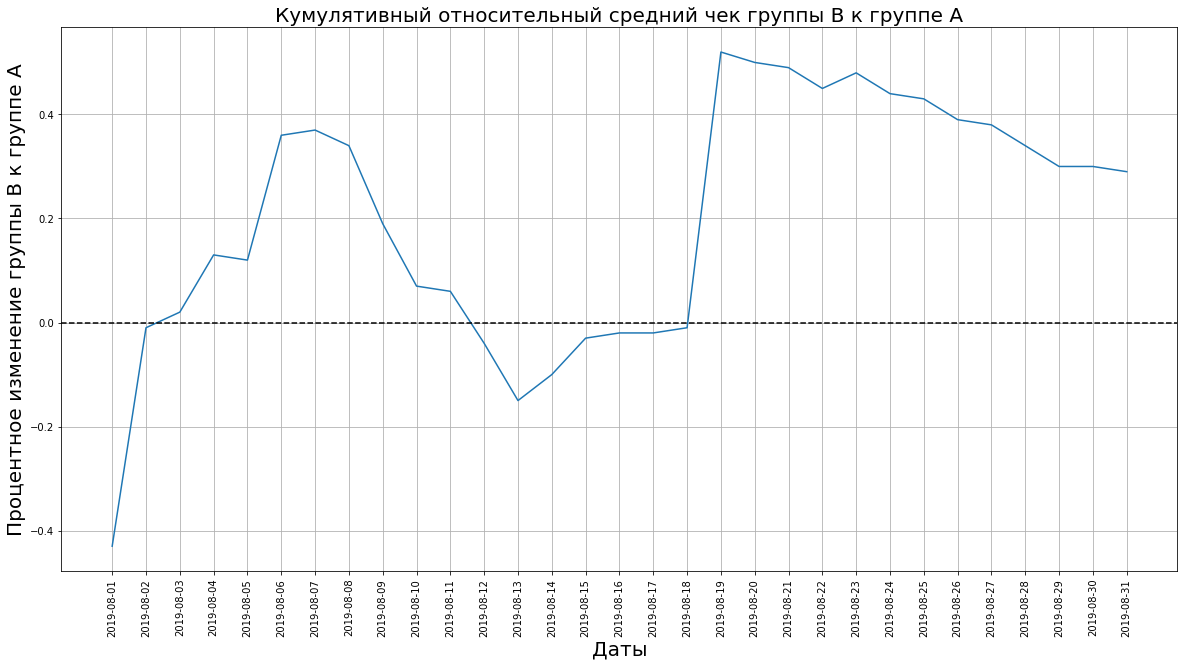

In [49]:
plt.subplots(figsize=(20, 10))
plt.plot(av_ch_a_b['date'], av_ch_a_b['cum_av_ch_a_to_b'])
plt.xticks(av_ch_a_b['date'], rotation =90)
plt.grid()
plt.title('Кумулятивный относительный средний чек группы B к группе A', fontsize=20)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Процентное изменение группы B к группе A', fontsize=20)
plt.show()

Со второго числа группа B вырывается вперёд и растёт до 7 числа. Затем видим ппадение группы B до выравнивания с группой A с 11 на 12 числа. С 12 до 18 числа группа B остаётся ниже группы B по среднему чеку. И затем ппроисходит резкий рост группы B с 18 на 19 числа. И затем видим постепенное снижение среднего чека группы B.

##### Конверсия, количество заказов по пользователям, стоимость заказов

In [50]:
visitor

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [51]:
av_ch

,date,group,visitors_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch
0,2019-08-01,A,19,142779,23,142779,23,6208,6208
1,2019-08-01,B,17,59758,17,59758,17,3515,3515
2,2019-08-02,A,18,91602,19,234381,42,4821,5580
3,2019-08-02,B,22,162043,23,221801,40,7045,5545
4,2019-08-03,A,24,112473,24,346854,66,4686,5255
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189


Соединим таблицы av_ch и visitor для дальнейших расчётов

In [52]:
ab_test = av_ch.merge(visitor, on=['date', 'group'], how='left')
ab_test

,date,group,visitors_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch,visitors
0,2019-08-01,A,19,142779,23,142779,23,6208,6208,719
1,2019-08-01,B,17,59758,17,59758,17,3515,3515,713
2,2019-08-02,A,18,91602,19,234381,42,4821,5580,619
3,2019-08-02,B,22,162043,23,221801,40,7045,5545,581
4,2019-08-03,A,24,112473,24,346854,66,4686,5255,507
...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307,531
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199,490
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333,490
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189,699


Вычислим конверсию

In [53]:
ab_test['conversion'] = (ab_test['transaction_number'] / ab_test['visitors']).round(3)

In [54]:
ab_test = ab_test.rename(columns={'visitors_number' : 'buyers_number'})

In [55]:
ab_test

,date,group,buyers_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch,visitors,conversion
0,2019-08-01,A,19,142779,23,142779,23,6208,6208,719,0.032
1,2019-08-01,B,17,59758,17,59758,17,3515,3515,713,0.024
2,2019-08-02,A,18,91602,19,234381,42,4821,5580,619,0.031
3,2019-08-02,B,22,162043,23,221801,40,7045,5545,581,0.040
4,2019-08-03,A,24,112473,24,346854,66,4686,5255,507,0.047
...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307,531,0.028
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199,490,0.018
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333,490,0.043
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189,699,0.011


Вычислим количество заказов на пользователя

In [56]:
ab_test['mean_transactions'] = ab_test['transaction_number'] / ab_test['buyers_number']

Вычислим стоимость среднего заказа

In [57]:
ab_test['mean_trans_cost'] = (ab_test['rev_by_day'] / ab_test['transaction_number']).round(0).astype('int')

### Кумулятивная конверсия

Для расчёта кумулятивной конверсии расчитаем кумулятивных покупателей  и кумулятивное число посетителей, и первое значение поделим на второе

In [58]:
ab_test['cum_visitors'] = ab_test.groupby('group')['visitors'].cumsum().round(3)

In [59]:
ab_test['cum_conversion'] = (ab_test['cum_transactions'] / ab_test['cum_visitors']).round(3)

In [60]:
ab_test

,date,group,buyers_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch,visitors,conversion,mean_transactions,mean_trans_cost,cum_visitors,cum_conversion
0,2019-08-01,A,19,142779,23,142779,23,6208,6208,719,0.032,1.210526,6208,719,0.032
1,2019-08-01,B,17,59758,17,59758,17,3515,3515,713,0.024,1.000000,3515,713,0.024
2,2019-08-02,A,18,91602,19,234381,42,4821,5580,619,0.031,1.055556,4821,1338,0.031
3,2019-08-02,B,22,162043,23,221801,40,7045,5545,581,0.040,1.045455,7045,1294,0.031
4,2019-08-03,A,24,112473,24,346854,66,4686,5255,507,0.047,1.000000,4686,1845,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307,531,0.028,1.000000,7073,17708,0.029
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199,490,0.018,1.125000,8687,18037,0.026
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333,490,0.043,1.000000,9963,18198,0.029
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189,699,0.011,1.000000,6655,18736,0.025


In [61]:
# Создадим таблицу с кумулятивной конверсией по группам для дальнейшего построения графиков
ab_test_conversion = ab_test[ab_test['group']=='A'][['date', 'cum_conversion','conversion']]\
.merge(ab_test[ab_test['group']=='B'][['date', 'cum_conversion', 'conversion']],\
       on='date', how='left', suffixes=['_a', '_b'])

In [62]:
ab_test_conversion.head()

,date,cum_conversion_a,conversion_a,cum_conversion_b,conversion_b
0,2019-08-01,0.032,0.032,0.024,0.024
1,2019-08-02,0.031,0.031,0.031,0.040
2,2019-08-03,0.036,0.047,0.030,0.028
3,2019-08-04,0.030,0.015,0.026,0.018
4,2019-08-05,0.030,0.029,0.027,0.030


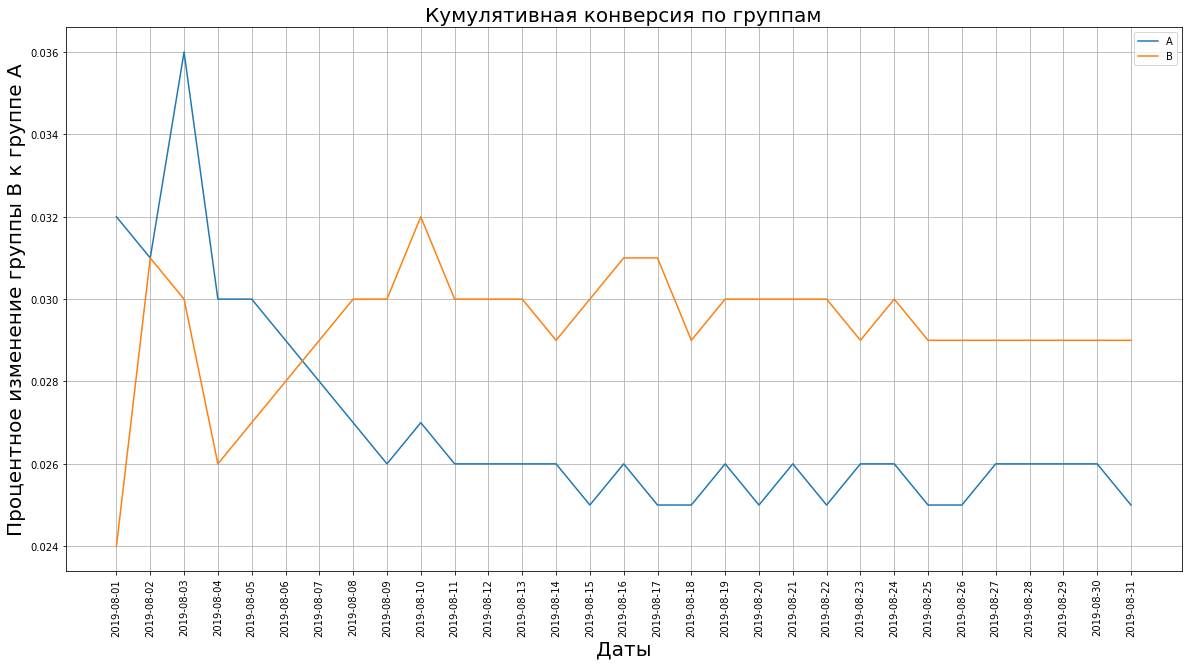

In [63]:
plt.subplots(figsize=(20, 10))
plt.plot(ab_test_conversion['date'], ab_test_conversion['cum_conversion_a'], label='A')
plt.plot(ab_test_conversion['date'], ab_test_conversion['cum_conversion_b'], label='B')
plt.legend()
plt.xticks(ab_test_conversion['date'], rotation =90)
plt.grid()
plt.title('Кумулятивная конверсия по группам', fontsize=20)
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Процентное изменение группы B к группе A', fontsize=20)
plt.show()

Конверсия группы B с 6 на 7 числа пересекается с группой A и продолжает свой рост до 10 числа. И далее группа B стабильно сохраняет значение в 29 - 31 процент. Группа A к 8 числу устанавливает уровень конверсии в 25 - 26 процентов. Группа A к третьему числу достигает своего пика в 36 процентов и затем падает вплоть до 9 числа, где и устанавливает свой стабильный уровень.

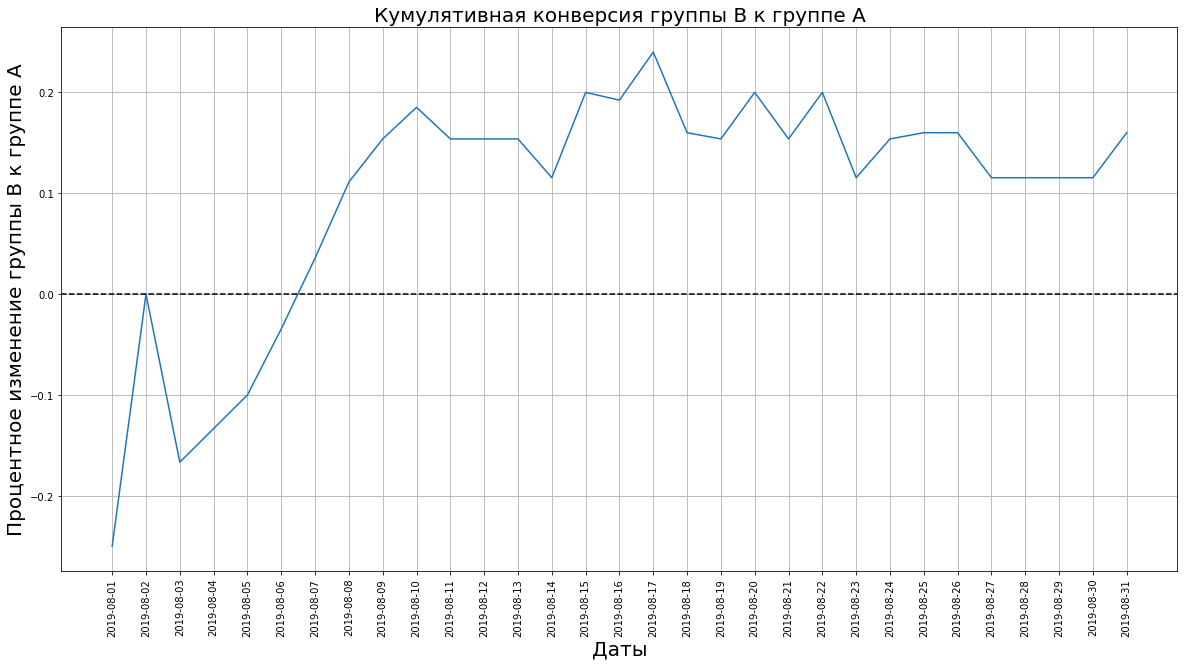

In [64]:
plt.subplots(figsize=(20, 10))
plt.plot(ab_test_conversion['date'], ab_test_conversion['cum_conversion_b'] / ab_test_conversion['cum_conversion_a']-1)
plt.xticks(ab_test_conversion['date'], rotation = 90)
plt.grid()
plt.title('Кумулятивная конверсия группы B к группе A', fontsize=20)
plt.axhline(y=0, linestyle='--', color='black')
plt.xlabel('Даты', fontsize=20)
plt.ylabel('Процентное изменение группы B к группе A', fontsize=20)
plt.show()

Картина с 6 на 7 числа подтверждается. И с 9 числа конверсия группы B превышает конверсию группы A 10 - 20 процентов до конца месяца, с одной пиковой точкой 17 числа, превышающей отметку в 20 процентов.

### Точечный график количества заказов по пользователям и перцентили заказов

In [65]:
order_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [66]:
orders_by_users = order_clean.groupby('visitor_id')['transaction_id'].nunique().reset_index()
orders_by_users.columns = ['visitor_id', 'n_transactions']

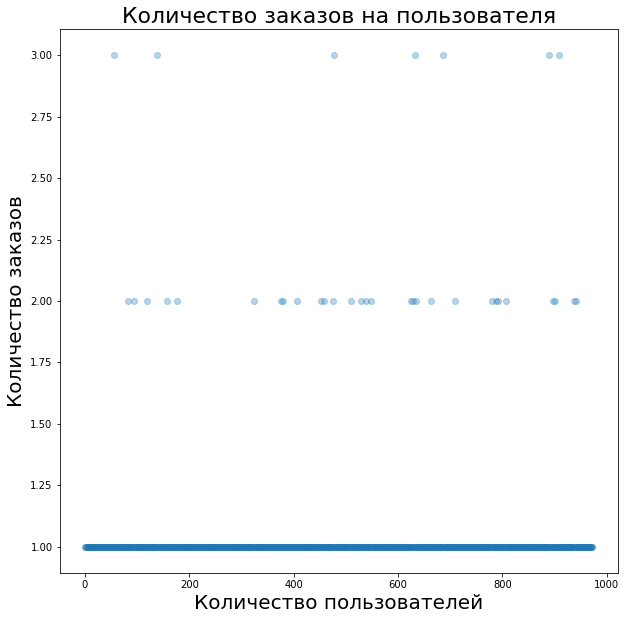

In [67]:
len_ord = pd.Series(range(0, len(orders_by_users['n_transactions'])))
plt.subplots(figsize=(10, 10))
plt.scatter(len_ord, orders_by_users['n_transactions'], alpha=0.3)
plt.title('Количество заказов на пользователя', fontsize=22)
plt.xlabel('Количество пользователей', fontsize=20)
plt.ylabel('Количество заказов', fontsize=20)
plt.show()

Большинство пользователей сделали один заказ. Небольшое количество пользователей сделали 2 заказа, а 3 заказа единичны.

In [68]:
print(np.percentile(orders_by_users['n_transactions'], [95, 99]))

[1. 2.]


99 перцентиль - 2 заказа. Возьмём 1 заказ за границу 

Построим 

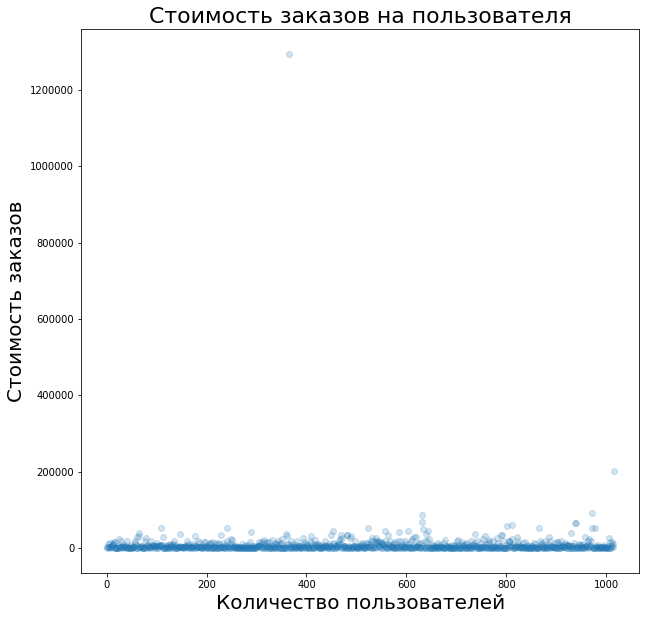

In [69]:
len_rev = pd.Series(range(0, len(order_clean['revenue'])))
plt.subplots(figsize=(10, 10))
plt.scatter(len_rev, order_clean['revenue'], alpha=0.2)
plt.title('Стоимость заказов на пользователя', fontsize=22)
plt.xlabel('Количество пользователей', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=20)
plt.show()

Большинство значений укладываются в 100000. Посмотрим более детально

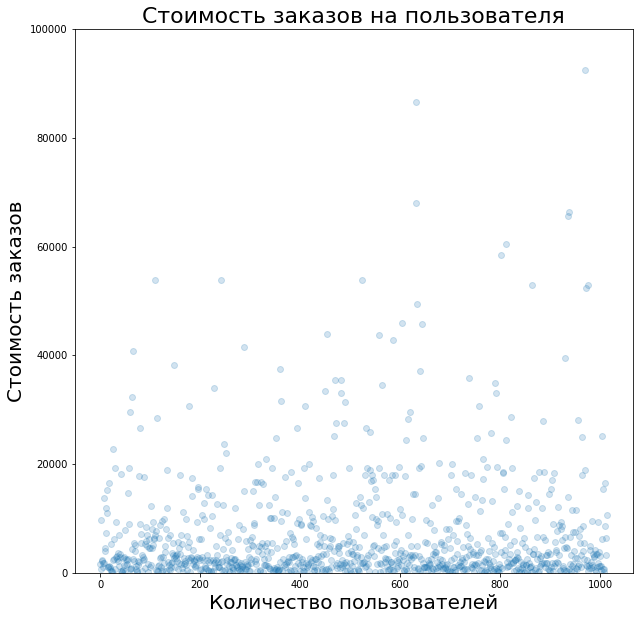

In [70]:
plt.subplots(figsize=(10, 10))
plt.scatter(len_rev, order_clean['revenue'], alpha=0.2)
plt.ylim(0, 100000)
plt.title('Стоимость заказов на пользователя', fontsize=22)
plt.xlabel('Количество пользователей', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=20)
plt.show()

In [71]:
print(np.percentile(order_clean['revenue'], [95, 99]))

[26785. 53904.]


95 перцентиль - 26785, а на графике видим достаточно мало значений уже после 30000. Последнее число и возьмём за границу перед выбросами

### Статистическая значимость различий конверсии сырых данных

Необходимо проверить следующие гипотезы:


    1. Конверсии групп A и B различаются
        
    2. Средний чек групп A и B различаются

In [72]:
# Средний чек по группам
av_ch_a_b.head()

,date,group_a,av_ch_a,cum_av_ch_a,group_b,av_ch_b,cum_av_ch_b,cum_av_ch_a_to_b
0,2019-08-01,A,6208,6208,B,3515,3515,-0.43
1,2019-08-02,A,4821,5580,B,7045,5545,-0.01
2,2019-08-03,A,4686,5255,B,4789,5349,0.02
3,2019-08-04,A,3743,5039,B,6921,5673,0.13
4,2019-08-05,A,3926,4792,B,4281,5344,0.12


In [73]:
order_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [74]:
ab_test

,date,group,buyers_number,rev_by_day,transaction_number,cum_rev,cum_transactions,av_ch,cum_av_ch,visitors,conversion,mean_transactions,mean_trans_cost,cum_visitors,cum_conversion
0,2019-08-01,A,19,142779,23,142779,23,6208,6208,719,0.032,1.210526,6208,719,0.032
1,2019-08-01,B,17,59758,17,59758,17,3515,3515,713,0.024,1.000000,3515,713,0.024
2,2019-08-02,A,18,91602,19,234381,42,4821,5580,619,0.031,1.055556,4821,1338,0.031
3,2019-08-02,B,22,162043,23,221801,40,7045,5545,581,0.040,1.045455,7045,1294,0.031
4,2019-08-03,A,24,112473,24,346854,66,4686,5255,507,0.047,1.000000,4686,1845,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,15,106100,15,4746610,510,7073,9307,531,0.028,1.000000,7073,17708,0.029
58,2019-08-30,A,8,78180,9,3311413,460,8687,7199,490,0.018,1.125000,8687,18037,0.026
59,2019-08-30,B,21,209223,21,4955833,531,9963,9333,490,0.043,1.000000,9963,18198,0.029
60,2019-08-31,A,8,53243,8,3364656,468,6655,7189,699,0.011,1.000000,6655,18736,0.025


Для статистического анализа конверсии создадим переменные sample_a и sample_b, в которых пользователям из разных групп будет соотвествовать количество заказов. Для создания этих переменных нам нужны данные о количестве посетителей по группам и данные о количестве заказов по каждому покупателю

In [75]:
ab_test_a = ab_test[ab_test['group']=='A'].reset_index()
ab_test_b = ab_test[ab_test['group']=='B'].reset_index()

In [76]:
orders_by_buyers_a = order_clean[order_clean['group']=='A'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id' : 'nunique'})
orders_by_buyers_b = order_clean[order_clean['group']=='B'].groupby('visitor_id', as_index=False)\
.agg({'transaction_id' : 'nunique'})

Объединим число заказов, соответствующее покупателями и посетителям. Последних найдём с помощью разницы между количеством посетителей и количеством покупателей.

In [77]:
sample_a = pd.concat([orders_by_buyers_a['transaction_id'],\
pd.Series(0, index=np.arange(ab_test_a['visitors'].sum() - len(orders_by_buyers_a['transaction_id'])),\
name='transaction_id')],axis=0)

In [78]:
sample_b = pd.concat([orders_by_buyers_b['transaction_id'],\
pd.Series(0, index=np.arange(ab_test_b['visitors'].sum() - len(orders_by_buyers_b['transaction_id'])),\
name='transaction_id')],axis=0)

Прежде статистического анализа узнаем нормально ли распределены выборки

In [79]:
alpha = 0.05
results_conv_a = st.shapiro(sample_a)
p_value_conv_a = results_conv_a[1]
print('p-значение: ', p_value_conv_a)
if p_value_conv_a < alpha:
    print('Отвергаем нулевую гипотезу: распределение конверсии группы А  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение конверсии группы А нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение конверсии группы А  не нормально


/opt/conda/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [80]:
results_cum_conv_b = st.shapiro(sample_b)
p_value_cum_conv_b = results_cum_conv_b[1]
print('p-значение: ', p_value_cum_conv_b)
if p_value_cum_conv_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение конверсии группы B  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение конверсии группы B нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение конверсии группы B  не нормально


Так как распределения не получились нормального вида, мы можем проанализировать группы с помощью непараметрического теста Манна-Уитни

Сформулируем нулевую и альтернативную гипотезы:

*Гипотеза 0: Различия в конверсии двух групп статистически не значимы*

*Альтернативная гипотеза: Различия в конверсии групп A и B статистически значимы.* 

In [81]:
results = st.mannwhitneyu(sample_a, \
                             sample_b, alternative='two-sided' )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница статистически не значима')
print('Конверсия сырых данных группы B выше конверсии группы A на {:.1%}'\
      .format(sample_b.mean() / sample_a.mean() - 1))

p-значение:  0.011018084110014691
Отвергаем нулевую гипотезу: разница статистически значима
Конверсия сырых данных группы B выше конверсии группы A на 16.0%


### Статистическая значимость различий среднего чека по сырым данным

*Гипотеза 0: Различия по среднему чеку двух групп статистически не значимы*

*Альтернативная гипотеза: Различия по среднему чеку групп A и B статистически значимы.* 

Проверим распределения по среднему чеку на нормальность

In [82]:
alpha = 0.05
results_av_ch_a_b = st.shapiro(av_ch_a_b['av_ch_a'])
p_value_av_ch_a_b = results_av_ch_a_b[1]
print('p-значение: ', p_value_av_ch_a_b)
if p_value_av_ch_a_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение среднего чека группы А  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы А нормально') 

p-значение:  0.017008859664201736
Отвергаем нулевую гипотезу: распределение среднего чека группы А  не нормально


In [83]:
results_av_ch_a_b = st.shapiro(av_ch_a_b['av_ch_b'])
p_value_av_ch_a_b = results_av_ch_a_b[1]
print('p-значение: ', p_value_av_ch_a_b)
if p_value_av_ch_a_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение среднего чека группы B  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы B нормально') 

p-значение:  1.0025143909464518e-10
Отвергаем нулевую гипотезу: распределение среднего чека группы B  не нормально


In [84]:
results = st.mannwhitneyu(av_ch_a_b['av_ch_b'], \
                             av_ch_a_b['av_ch_a'], alternative='two-sided' )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница статистически не значима')
print('Средний чек группы B выше среднего чека группы A на {:.1%}'\
      .format(av_ch_a_b['av_ch_b'].mean() /  av_ch_a_b['av_ch_a'].mean() - 1))

p-значение:  0.9606996420323641
Не получилось отвергнуть нулевую гипотезу: разница статистически не значима
Средний чек группы B выше среднего чека группы A на 20.3%


Разница среднего чека сырых данных статистически не значима

### Фильтрация сырых данных

Теперь отфильтруем таблицу по выбранным границам в 1 заказ на покупателя и в стоимость заказа не более 30000

In [85]:
order_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Найдём покупателей, количество покупок которых больше одного

In [86]:
number_of_orders = order_clean.groupby('visitor_id')['revenue']\
.count()\
.reset_index()\
.rename(columns={'revenue' : 'number_of_orders'})

In [87]:
abnormal_users = number_of_orders[number_of_orders['number_of_orders'] > 1]
abnormal_users.head()

,visitor_id,number_of_orders
55,249864742,3
82,366673373,2
94,406208401,2
118,522292794,2
138,611059232,3


Уберём из таблицы order_clean выбросы

In [88]:
order_w_out = order_clean[(order_clean['revenue'] <= 30000) & (~order_clean['visitor_id'].isin(abnormal_users['visitor_id']))]

In [89]:
order_w_out

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1190,38478481,1197745035,2019-08-14,8600,B
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A


In [90]:
order_w_out_grouped = order_w_out.groupby(['date', 'group'])\
.agg({'visitor_id' : 'nunique', 'revenue' : 'sum', 'transaction_id' : 'count'})\
.reset_index()\
.rename(columns={'visitor_id' : 'buyers_count', 'revenue' : 'rev_by_day', 'transaction_id' : 'transaction_count'})

In [91]:
ab_w_out = order_w_out_grouped.merge(visitor, on=['date', 'group'], how='left')

In [92]:
ab_w_out

,date,group,buyers_count,rev_by_day,transaction_count,visitors
0,2019-08-01,A,15,89858,15,719
1,2019-08-01,B,17,59758,17,713
2,2019-08-02,A,15,46483,15,619
3,2019-08-02,B,18,84864,18,581
4,2019-08-03,A,24,112473,24,507
...,...,...,...,...,...,...
57,2019-08-29,B,14,104466,14,531
58,2019-08-30,A,7,33030,7,490
59,2019-08-30,B,18,94503,18,490
60,2019-08-31,A,8,53243,8,699


In [93]:
ab_w_out['av_ch'] = (ab_w_out['rev_by_day'] / ab_w_out['transaction_count']).round().astype('int')

Разделим таблицы по группам A и B

In [94]:
ab_w_out_separated = ab_w_out[ab_w_out['group']=='A'][['date', 'group', 'av_ch']]\
.merge(ab_w_out[ab_w_out['group']=='B'][['date', 'group', 'av_ch']],\
       on='date', how='left', suffixes=['_a', '_b'])

In [95]:
ab_w_out_separated.head()

,date,group_a,av_ch_a,group_b,av_ch_b
0,2019-08-01,A,5991,B,3515
1,2019-08-02,A,3099,B,4715
2,2019-08-03,A,4686,B,4789
3,2019-08-04,A,4107,B,4790
4,2019-08-05,A,3980,B,4281


In [96]:
ab_w_out_a = ab_w_out[ab_w_out['group']=='A'].reset_index()
ab_w_out_b = ab_w_out[ab_w_out['group']=='B'].reset_index()

In [97]:
orders_by_buyers_w_out_a = order_w_out[order_w_out['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_buyers_w_out_b = order_w_out[order_w_out['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})

In [98]:
sample_w_out_a = pd.concat([orders_by_buyers_w_out_a['transaction_id'],\
pd.Series(0, index=np.arange(ab_w_out_a['visitors'].sum() - len(orders_by_buyers_w_out_a['transaction_id'])),\
name='transaction_id')],axis=0)

In [99]:
sample_w_out_b = pd.concat([orders_by_buyers_w_out_b['transaction_id'],\
pd.Series(0, index=np.arange(ab_w_out_b['visitors'].sum() - len(orders_by_buyers_w_out_b['transaction_id'])),\
name='transaction_id')],axis=0)

### Статистическая значимость различия конверсии

Проведём статистический анализ групп. Для начала сформулируем гипотезы и проверим нормальность распределения конверсий и средних чеков

*Гипотеза 0: Различия в конверсии двух групп по очищенным данным статистически не значимы*

*Альтернативная гипотеза: Разниличия в конверсии групп A и B по очищенным данным статистически значимы.* 

In [100]:
alpha = 0.05
results_conv_a = st.shapiro(sample_w_out_a)
p_value_conv_a = results_conv_a[1]
print('p-значение: ', p_value_conv_a)
if p_value_conv_a < alpha:
    print('Отвергаем нулевую гипотезу: распределение конверсии группы А  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение конверсии группы А нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение конверсии группы А  не нормально


In [101]:
results_conv_b = st.shapiro(sample_w_out_b)
p_value_conv_b = results_conv_b[1]
print('p-значение: ', p_value_conv_b)
if p_value_conv_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение конверсии группы B  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение конверсии группы B нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение конверсии группы B  не нормально


In [102]:
results = st.mannwhitneyu(sample_w_out_a, \
                             sample_w_out_b, alternative='two-sided' )
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница статистически не значима')
print('Конверсия группы B выше конверсии группы A на {:.1%}'\
      .format(sample_w_out_b.mean() /  sample_w_out_a.mean() - 1))

p-значение:  0.01268377207021448
Отвергаем нулевую гипотезу: разница статистически значима
Конверсия группы B выше конверсии группы A на 17.9%


### Статистическая значимость различия среднего чека

*Гипотеза 0: Различия по среднему чеку двух групп очищенных данных статистически не значимы*

*Альтернативная гипотеза: Разничия в конверсии групп A и B очищенных данных статистически значимы.* 

In [103]:
alpha = 0.05
results_av_ch_a = st.shapiro(ab_w_out_separated['av_ch_a'])
p_value_av_ch_a = results_av_ch_a[1]
print('p-значение: ', p_value_av_ch_a)
if p_value_av_ch_a < alpha:
    print('Отвергаем нулевую гипотезу: распределение среднего чека группы А  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы А нормально') 

p-значение:  0.4615726172924042
Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы А нормально


In [104]:
results_av_ch_b = st.shapiro(ab_w_out_separated['av_ch_b'])
p_value_av_ch_b = results_av_ch_b[1]
print('p-значение: ', p_value_av_ch_b)
if p_value_av_ch_b < alpha:
    print('Отвергаем нулевую гипотезу: распределение среднего чека группы B  не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы B нормально') 

p-значение:  0.5311033129692078
Не получилось отвергнуть нулевую гипотезу: распределение среднего чека группы B нормально


Так как распределения нормальны, можем применить тест Стьюдента. 

In [105]:
results = st.ttest_ind(ab_w_out_separated['av_ch_b'], ab_w_out_separated['av_ch_a'], equal_var = True)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу: разница статистически не значима')
print('Средний чек группы B выше среднего чека группы A на {:.1%}'\
      .format(ab_w_out_separated['av_ch_b'].mean() /  ab_w_out_separated['av_ch_a'].mean() - 1))

p-значение:  0.7001578037972114
Не получилось отвергнуть нулевую гипотезу: разница статистически не значима
Средний чек группы B выше среднего чека группы A на -3.2%


По среднему чеку ничего не изменилось. Разница так же статистически не значима.

# Выводы:

В данной работе переда нами стояли следующие цели:
    1. Выбор перспективных гипотез
    2. Оценить влияние факторов, отличающих группу B от группы A, на кумулятивную конверсию, кумулятивный средний чек и кумулятивную выручку.
    3. Произвести статистическую оценку различия групп по конверсии и среднему чеку. А также посмотреть, как меняются эти   показатели после удаления выбросов по количеству заказов и стоимости заказов.

Данные, по большей части были чистыми: не было обнаружено дубликатов или пропусков, но  были найдены 58 покупателей, попавших в обе группы. Их пришлось удалить, так как это могло существенно повлиять на результаты теста.

Для приоритизации гипотез использовались метрики ICE и RICE. 

In [106]:
rice

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Для дальнейшей работы были выбраны гипотезы 7 и 2, так как они затрагивают наибольшее количество пользователей. Также выделили гипотезы 0 и 6, которые можно проверить при достаточном объёме ресурсов.

Дальше были произведены расчёты кумулятивной выручки, среднего чека, кумулятивного среднего чека и кумулятивной конверсии. Получили следующие результаты:
    1. Общая выручка группы A достигает 3 миллионов 400 тысяч, а группа B к концу теста достигла 5 миллионов. Причём резкий скачок по  выручке в группе B произошёл с 18 на 19 числа. А далее идёт стабильный рост, особенно не отличающийся от группы A. Можем предположить, что произошла единичная большая покупка. Также был найден резкий скачок по выручке с 5 на 6 числа, что тоже может являться большой покупкой. С пятого числа кумулятивная выручка группы B Становится выше выручки группы A. 
    С пятого числа кумулятивная выручка группы B становится на уровень с группой A и начинает рост, достигая пика в 40 процентов 8 числа. Затем падает вплоть до 13 числа, выравниваясь с группой A. Далее происходит рост относительной выручки до 20 процентов к 15 числу, далее сохраняет свой уровень до 18 числа. И с 18 на 19 числа опять видим резкий всплеск показателя до 80 процентов. И далее постепенное снижение до уровня 50 процентов к 29 числу.
    2. Максимум кумулятивного среднего чека группы A в районе 7000, а максимум группы B - 10500. Как и с кумулятивной выручкой, с 18 на 19 числа происходит резкий скачок среднего чека в группе B с отметки 6800 до отметки в 10500. Как мы предполагали раньше, это выбивающаяся крупная покупка. С 5 по 7 числа виден рост среднего чека в группе B, но затем группы выравниваются на 11 число, а далее группа A делает скачок с 11 по 13 числа. После пика в 10500 группа B постепенно падает, но остаётся выше группы A, минимум, на 2000.
    3. Кумулятивная конверсия группы B с 6 на 7 числа пересекается с группой A и продолжает свой рост до 10 числа. И далее группа B стабильно сохраняет значение в 29 - 31 процент. Группа A к 8 числу устанавливает уровень конверсии в 25 - 26 процентов. Группа A к третьему числу достигает своего пика в 36 процентов и затем падает вплоть до 9 числа, где устанавливает свой стабильный уровень в 25-26 процентов. C 9 числа конверсия группы B превышает конверсию группы A на 10 - 20 процентов до конца месяца, с одной пиковой точкой 17 числа, превышающей отметку в 20 процентов.

Далее были найдены выбросы по количеству заказов на пользователя и стоимости заказов с помощью графиков и 95 и 99 перцентилей. На основании этих данных мы выбрали 1 заказ на пользователя и стоимость заказа не более 30000.

Затем мы произвели статистическую обработку не очищенных от выбросов данных по группам и очищенных данных по группам. Показателями для статистической обработки были конверсия в покупку и средний чек. Статистическая значимость различий по среднему чеку до обработки и после обработки данных между группами отсутствует. Различия в конверсии групп в покупку в обоих случаях признали значимой. По не обработанным конверсия составила 16 процентов, по обработанным даже выше - 17,9 процентов.

Необходимо остановить тест и зафиксировать победу группы B, так как была зафиксирована статистическая значимость различий конверсии в покупку. 

# Информация о проделанной работе:

    1. Приоритизировали гипотезы
    2. Проделали предобработку данных
    3. Построили графики кумулятивной выручки и относительной кумулятивной выручки по группам
    4. Построили графики среднего чека и относительного среднего чека по группам
    5. Построили графики кумулятивной конверсии и относительной кумулятивной конверсии по группам
    6. Построили точечные графики выбросов по количеству заказов и сумме заказов
    7. Оценили статистическую значимость различий групп по конверсии и среднему чеку сырых и очищенных данных